<h1 style='font-size: 35px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>Compact Letter Display (CLD) | Post-Hoc Test Grouping Visualization</h1>

---

- In statistical analysis, conducting an ANOVA (Analysis of Variance) helps determine whether there are significant differences among group means, but it doesn't reveal which specific groups differ. To identify these differences, post-hoc tests like Tukey’s HSD (Honest Significant Difference) are used to perform pairwise comparisons between groups. An effective way to present these comparisons is through Compact Letter Displays (CLDs), which assign letters to groups to indicate statistical similarity. Groups sharing the same letter are not significantly different, while those with different letters are. CLDs enhance the clarity and interpretability of results, especially when visualizing large datasets or numerous group comparisons.

- This analysis demonstrates how to apply CLDs after performing ANOVA and Tukey’s HSD tests to highlight significant group differences. Each group will be assigned one or more letters based on statistical similarity, and the results will be presented in both tabular and visual formats. This method not only simplifies interpretation but also provides a clear, visual summary of the group relationships, making it easier to communicate findings to both technical and non-technical audiences.


<h1 style=' font-weight: 600; font-size: 18px; text-align: left'>1.0. Import Required Libraries</h1>

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols as smf_ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.formula.api import ols 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import seaborn as sns
import pandas as pd
import numpy as np
import string
import math
import re

<h1 style='font-weight: 600; font-size: 18px; text-align: left'>2.0. Import and Preprocessing Dataset</h1>

In [2]:
filepath = "Datasets/Eggplant Fusarium Fresistance Data.csv"
df = pd.read_csv(filepath)
display(df)

,Variety,Resistance Level,Replication ID,Infection Severity (%),Wilt index,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
0,EP-R1,Resistant,1,22.5,0.7,88.9,21,88.8,23.4
1,EP-R1,Resistant,2,27.9,1.2,82.2,19,87.7,21.7
2,EP-R1,Resistant,3,21.2,0.0,74.7,17,84.9,27.2
3,EP-R1,Resistant,4,15.5,0.1,93.8,18,90.3,15.0
4,EP-R1,Resistant,5,17.3,0.9,78.1,19,87.0,23.0
...,...,...,...,...,...,...,...,...,...
795,EP-S3,Susceptible,96,75.2,3.6,68.2,7,6.4,85.5
796,EP-S3,Susceptible,97,74.8,4.9,59.5,4,27.2,82.0
797,EP-S3,Susceptible,98,58.1,3.6,78.8,7,30.8,75.4
798,EP-S3,Susceptible,99,54.1,4.1,63.7,7,24.1,81.8


<h1 style=' font-weight: 600; font-size: 18px; text-align: left'>3.0. Exploratory Data Analysis</h1>

Now, let’s move into Exploratory Data Analysis (EDA) — an important step where we take a closer look at our dataset to understand its structure, identify patterns, detect anomalies, and get a sense of the overall distribution of plant parameters. This will help us gain valuable insights and guide the direction of our statistical tests and interpretations.

In [3]:
df.shape

(800, 9)

In [4]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Variety
--------------- Resistance Level
--------------- Replication ID
--------------- Infection Severity (%)
--------------- Wilt index
--------------- Plant height (cm)
--------------- Days to wilt symptoms
--------------- Survival rate (%)
--------------- Disease incidence (%)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Variety                 800 non-null    object 
 1   Resistance Level        800 non-null    object 
 2   Replication ID          800 non-null    int64  
 3   Infection Severity (%)  800 non-null    float64
 4   Wilt index              800 non-null    float64
 5   Plant height (cm)       800 non-null    float64
 6   Days to wilt symptoms   800 non-null    int64  
 7   Survival rate (%)       800 non-null    float64
 8   Disease incidence (%)   800 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 56.4+ KB


<h4 style='font-size: 15px; font-weight: 600'>3.1.1: Columns Summary</h4>

In [7]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Variety,object,0,800,8,"{'EP-R1': 100, 'EP-R2': 100, 'EP-R3': 100, 'EP..."
1,Resistance Level,object,0,800,3,"{'Resistant': 300, 'Susceptible': 300, 'Modera..."
2,Replication ID,int64,0,800,100,"{1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: ..."
3,Infection Severity (%),float64,0,800,473,"{21.4: 6, 22.6: 6, 21.2: 6, 19.1: 6, 21.3: 5, ..."
4,Wilt index,float64,0,800,51,"{5.0: 31, 4.3: 26, 4.0: 25, 0.5: 24, 0.9: 24, ..."
5,Plant height (cm),float64,0,800,345,"{72.0: 9, 85.6: 6, 72.8: 6, 85.1: 6, 79.1: 6, ..."
6,Days to wilt symptoms,int64,0,800,20,"{7: 115, 8: 66, 6: 64, 19: 60, 12: 58, 18: 53,..."
7,Survival rate (%),float64,0,800,488,"{100.0: 7, 90.4: 6, 85.0: 6, 86.9: 5, 29.0: 5,..."
8,Disease incidence (%),float64,0,800,492,"{82.7: 6, 78.9: 5, 84.0: 5, 24.0: 4, 83.5: 4, ..."


<h4 style='font-size: 15px; font-weight: 600'>3.1.2: Checking Missing Values</h4>

Checking for missing values is a crucial step in data analysis to assess the completeness and reliability of the dataset. This involves identifying any columns with null or empty entries, which may affect the accuracy of statistical models.

In [8]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Variety,0,0.0
1,Resistance Level,0,0.0
2,Replication ID,0,0.0
3,Infection Severity (%),0,0.0
4,Wilt index,0,0.0
5,Plant height (cm),0,0.0
6,Days to wilt symptoms,0,0.0
7,Survival rate (%),0,0.0
8,Disease incidence (%),0,0.0



<h4 style='font-size: 15px; font-weight: 600'>3.1.3: Exploring Invalid Entries Dtypes</h4>


Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [9]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)

,Missing,Datetime,Numeric,String,Other
Variety,-,-,-,100.00%,-
Resistance Level,-,-,-,100.00%,-
Replication ID,-,-,100.00%,-,-
Infection Severity (%),-,-,100.00%,-,-
Wilt index,-,-,100.00%,-,-
Plant height (cm),-,-,100.00%,-,-
Days to wilt symptoms,-,-,100.00%,-,-
Survival rate (%),-,-,100.00%,-,-
Disease incidence (%),-,-,100.00%,-,-


<h1 style='font-weight: 600; font-size: 20px; text-align: left'>4.0. Hypothes Testing | Inferential Statistics</h1>

<h4 style='font-size: 15px;  font-weight: 600'>4.1: Group-wise Comparatives Analysis of Continuous variables</h4>

Now, let’s turn our attention to comparing the means of variables across different specified groups. By grouping the data based on a categorical feature, we can calculate the mean of each continuous variable within each group. This allows us to identify differences or similarities in average values between groups, offering insights into how the variable behaves under different conditions or categories.


In [10]:
def summary_stats(df, group):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

results = summary_stats(df, group='Variety')
results

,Variety,Replication ID,Infection Severity (%),Wilt index,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
0,EP-M1,50.50 ± 2.90,44.16 ± 1.06,2.56 ± 0.07,74.44 ± 0.51,11.99 ± 0.15,54.57 ± 1.00,50.54 ± 0.79
1,EP-M2,50.50 ± 2.90,45.44 ± 1.01,2.51 ± 0.07,75.18 ± 0.44,11.85 ± 0.16,55.77 ± 1.00,51.75 ± 1.02
2,EP-R1,50.50 ± 2.90,20.69 ± 0.43,0.73 ± 0.05,84.80 ± 0.59,17.97 ± 0.19,89.25 ± 0.52,25.84 ± 0.72
3,EP-R2,50.50 ± 2.90,20.81 ± 0.46,0.83 ± 0.05,85.33 ± 0.60,17.98 ± 0.20,90.49 ± 0.46,26.17 ± 0.78
4,EP-R3,50.50 ± 2.90,20.89 ± 0.42,0.82 ± 0.05,84.84 ± 0.58,18.51 ± 0.20,89.61 ± 0.47,25.25 ± 0.70
5,EP-S1,50.50 ± 2.90,75.26 ± 1.08,4.20 ± 0.06,65.22 ± 0.50,6.82 ± 0.12,24.14 ± 0.80,81.24 ± 0.75
6,EP-S2,50.50 ± 2.90,73.99 ± 0.91,4.11 ± 0.05,65.47 ± 0.54,6.91 ± 0.10,24.66 ± 0.89,79.57 ± 0.65
7,EP-S3,50.50 ± 2.90,73.91 ± 0.89,4.18 ± 0.06,64.71 ± 0.53,6.76 ± 0.12,24.44 ± 0.75,80.79 ± 0.61
8,Grand Mean,50.5,46.8925,2.491375,74.999,12.34875,56.616625,52.64475
9,SEM,1.021208,0.872476,0.055506,0.358316,0.182561,1.037616,0.881565


<h4 style='font-size: 15px; font-weight: 600'>4.2: Analysis of Varience (One Way ANOVA)</h4>


A one-way ANOVA (Analysis of Variance) is a statistical test used to determine if there are significant differences between the means of three or more independent groups based on a single factor (or independent variable). It assesses whether the factor has an effect on the dependent variable. If the p-value from the test is less than a specified significance level (usually 0.05), it suggests that at least one group mean is significantly different from the others. 

In [11]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)
    
def One_way_anova(data, Metrics, group_cols):
    results = []
    original_group_cols = group_cols[:]  # Save original names for reporting
    group_cols = [rename(col) for col in group_cols]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    for original_group, group in zip(original_group_cols, group_cols):
        for col in Metrics:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({group})" 
            model = smf.ols(formula, data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual":
                    interpretation = "-"
                
                results.append({
                    "Variable": col,
                    #"Factor": original_group,  # Use original name here
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

group_cols = ['Variety']
Metrics = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
Anova_results = One_way_anova(df, Metrics, group_cols)
Anova_results

,Variable,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Infection Severity (%),C(Variety),432094.824800,7.0,897.471869,0.000000e+00,Significant
1,Infection Severity (%),Residual,54473.510200,792.0,NaN,NaN,-
2,Wilt index,C(Variety),1705.218388,7.0,730.608347,0.000000e+00,Significant
3,Wilt index,Residual,264.072100,792.0,NaN,NaN,-
4,Plant height (cm),C(Variety),59239.970600,7.0,293.622132,3.638405e-215,Significant
5,Plant height (cm),Residual,22827.228600,792.0,NaN,NaN,-
6,Days to wilt symptoms,C(Variety),19302.908750,7.0,1091.561957,0.000000e+00,Significant
7,Days to wilt symptoms,Residual,2000.790000,792.0,NaN,NaN,-
8,Survival rate (%),C(Variety),641645.803988,7.0,1559.681726,0.000000e+00,Significant
9,Survival rate (%),Residual,46546.444900,792.0,NaN,NaN,-


<h4 style='font-size: 15px; font-weight: 600'>4.3: Tukey's Honest Significant Difference (THSD)</h4>

Now, let's perform Tukey’s Honest Significant Difference (THSD) test to determine which groups are statistically similar or different. While ANOVA tells us if there is a significant difference among groups, it does not specify which groups differ. Tukey’s HSD helps by comparing all possible group pairs and assigning statistical significance to their differences. This step is crucial in identifying which groups share similarities and which ones are distinct, allowing for a more detailed interpretation of the results.

In [12]:
def Turkey_results(df, Metrics, group=''):
    results_data = []
    for metric in Metrics:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[group], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Difference': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df


Metrics = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
Turkeyresults = Turkey_results(df, Metrics, group='Variety')
pd.set_option("display.float_format", "{:.3f}".format)
Turkeyresults

,Metric,Group1,Group2,Mean Difference,P-Value,Lower CI,Upper CI,Reject Null
0,Infection Severity (%),EP-M1,EP-M2,1.270,0.960,-2.294,4.834,False
1,Infection Severity (%),EP-M1,EP-R1,-23.478,0.000,-27.042,-19.914,True
2,Infection Severity (%),EP-M1,EP-R2,-23.354,0.000,-26.918,-19.790,True
3,Infection Severity (%),EP-M1,EP-R3,-23.273,0.000,-26.837,-19.709,True
4,Infection Severity (%),EP-M1,EP-S1,31.092,0.000,27.528,34.656,True
...,...,...,...,...,...,...,...,...
163,Disease incidence (%),EP-R3,EP-S2,54.322,0.000,51.054,57.590,True
164,Disease incidence (%),EP-R3,EP-S3,55.547,0.000,52.279,58.815,True
165,Disease incidence (%),EP-S1,EP-S2,-1.672,0.777,-4.940,1.596,False
166,Disease incidence (%),EP-S1,EP-S3,-0.447,1.000,-3.715,2.821,False


<h4 style='font-size: 15px; font-weight: 600'>4.4: Compact Letter Display (CLD)</h4>

Now, let's compute the **Compact Letter Display (CLD)** across group pairs to summarize the statistical differences between them in a clear and concise table. CLD helps visually represent which groups differ significantly in their means by assigning letters—groups sharing the same letter are not significantly different. This summary makes it easier to interpret multiple pairwise comparisons simultaneously, providing an intuitive overview of group similarities and differences across the dataset.


In [16]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)
    
def Compact_letters_display(df, Factor='', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    def calculate_stats_for_column(col_name):
        model = smf_ols(f'{col_name}~C({Factor})', data=df).fit()
        anova_results = anova_lm(model)
        p_value = anova_results.loc[f'C({Factor})', 'PR(>F)']
        tukey = pairwise_tukeyhsd(df[col_name], df[Factor])
        Turkey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        group_labels = letters(Turkey_results)
        stats = df.groupby(Factor)[col_name].agg(['mean', 'sem']).round(2)
        stats['letter'] = stats.index.map(group_labels)
        stats['formatted'] = stats.apply(
            lambda x: f"{x['mean']:.2f} ± {x['sem']:.2f} {x['letter']}", axis=1)
        
        return stats['formatted'], p_value
    results = {}
    p_values = {}
    for col in numeric_cols:
        results[col], p_values[col] = calculate_stats_for_column(col)
    
    results_df = pd.DataFrame(results)
    results_df.index.name = Factor
    p_values_formatted = {col: f"{p:.4f}" + ('***' if p <= 0.001 else '**' if p <= 0.01 else '*' if p <= 0.05 else 'ns') 
                         for col, p in p_values.items()}
    p_value_df = pd.DataFrame([p_values_formatted], index=['p-value'])
    final_results = pd.concat([results_df, p_value_df])
    return final_results

def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld

def compact_letter_table(df, group, savepath=None):
    data = df.copy()
    group_col = rename(group)
    data.columns = data.columns.to_series().apply(rename)
    results_df = Compact_letters_display(data, Factor=group_col)
    results_df_columns = df.select_dtypes(include=[np.number]).columns
    results_df.columns = results_df_columns
    if savepath: results_df.to_csv(savepath, index=False)
    return results_df

column_to_exclude = ['Replication ID']
filtered_data = df.drop(columns=column_to_exclude)

results = compact_letter_table(filtered_data, group="Variety", savepath=None)
display(results)

,Infection Severity (%),Wilt index,Plant height (cm),Days to wilt symptoms,Survival rate (%),Disease incidence (%)
EP-M1,44.16 ± 1.06 a,2.56 ± 0.07 a,74.44 ± 0.51 a,11.99 ± 0.15 a,54.57 ± 1.00 a,50.54 ± 0.79 a
EP-M2,45.44 ± 1.01 a,2.51 ± 0.07 a,75.18 ± 0.44 a,11.85 ± 0.16 a,55.77 ± 1.00 a,51.75 ± 1.02 a
EP-R1,20.69 ± 0.43 b,0.73 ± 0.05 b,84.80 ± 0.59 b,17.97 ± 0.19 b,89.25 ± 0.52 b,25.84 ± 0.72 b
EP-R2,20.81 ± 0.46 b,0.83 ± 0.05 b,85.34 ± 0.60 b,17.98 ± 0.20 b,90.49 ± 0.46 b,26.17 ± 0.78 b
EP-R3,20.89 ± 0.42 b,0.82 ± 0.05 b,84.84 ± 0.58 b,18.51 ± 0.20 b,89.61 ± 0.47 b,25.24 ± 0.70 b
EP-S1,75.26 ± 1.08 c,4.20 ± 0.06 c,65.22 ± 0.50 c,6.82 ± 0.12 c,24.14 ± 0.80 c,81.24 ± 0.75 c
EP-S2,73.99 ± 0.91 c,4.11 ± 0.05 c,65.47 ± 0.54 c,6.91 ± 0.10 c,24.66 ± 0.89 c,79.57 ± 0.65 c
EP-S3,73.91 ± 0.89 c,4.18 ± 0.06 c,64.71 ± 0.53 c,6.76 ± 0.12 c,24.44 ± 0.75 c,80.79 ± 0.61 c
p-value,0.0000***,0.0000***,0.0000***,0.0000***,0.0000***,0.0000***


<h4 style='font-size: 15px; font-weight: 600'>4.5: Compact Letter Display (CLD) Visualization</h4>

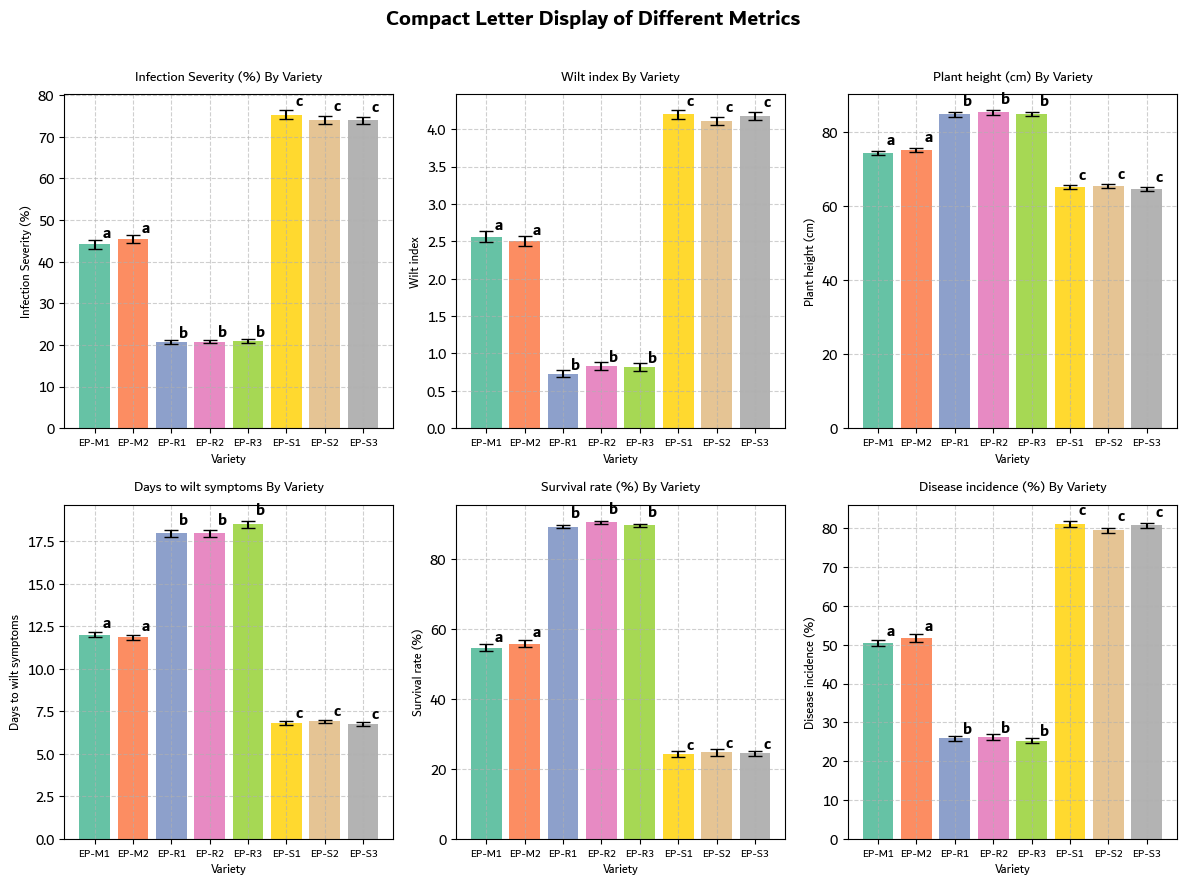

In [26]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)

def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld
    
def cld_plot(df, Metrics, group, savepath=None):
    df[Metrics].columns = df[Metrics].columns.to_series().apply(rename)
    num_variables = len(Metrics)
    cols = min(num_variables, 3)
    rows = math.ceil(num_variables / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    if num_variables > 1 : fig.suptitle("Compact Letter Display of Different Metrics", fontsize=16, fontweight="bold")
    
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, col in enumerate(Metrics):
        Turkey = pairwise_tukeyhsd(df[col], groups=df[group])
        Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
        group_labels = letters(Turkeyresults)
        Aggregate_df = df.groupby(group)[col].agg(["mean", "sem"]).reset_index()
        ax = axes[idx]

        error = np.full(len(Aggregate_df), Aggregate_df["sem"])
        colors = plt.cm.Set2(np.linspace(0, 1, len(Aggregate_df)))
        bars = ax.bar(Aggregate_df[group], Aggregate_df["mean"], yerr=error, color=colors, capsize=5)
        for bar, Letters in zip(bars, Aggregate_df[group]):
            height = bar.get_height()
            offset = height * 0.02
            ax.annotate(group_labels[Letters],
                        xy=(bar.get_x() + bar.get_width() / 2, height + offset),
                        xytext=(9, 0),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=12, fontweight="bold")
    
        
        ax.set_xticks(range(len(Aggregate_df[group])))
        ax.set_xticklabels(Aggregate_df[group], rotation=0, ha="center", fontsize=8)
        ax.set_xlabel(group, fontsize=9)
        ax.set_ylabel(col, fontsize=9)
        ax.set_title(f"{col} By {group.title()}", fontsize=10, pad=10)
        ax.grid(linestyle="--", alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath: plt.savefig(savepath)
    plt.show()

Metrics = ['Infection Severity (%)', 'Wilt index', 'Plant height (cm)', 'Days to wilt symptoms', 'Survival rate (%)', 'Disease incidence (%)']
cld_plot(df, Metrics, group='Variety')

---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

---

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

<h1 style='font-size: 55px; color: red; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>